# FINANCE RISK ANALYSIS-PART -B

## Context

Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

## Objective

The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

1. Risk Assessment: Analyze historical volatility of individual stocks and the overall portfolio.
2. Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
3. Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
4. Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

## Data Dictionary

The dataset contains weekly stock price data for 5 Indian stocks over an 8-year period. The dataset enables us to analyze the historical performance of individual stocks and the overall market dynamics.

# Importing necessary Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)


Seaborn version: 0.12.2
Matplotlib version: 3.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
df = pd.read_csv('Market_Risk_Data_coded.csv')
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [4]:
df.tail()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
413,26-02-2024,411,1118,937,898,26
414,04-03-2024,412,1132,993,925,25
415,11-03-2024,417,1186,1035,928,24
416,18-03-2024,419,1225,946,826,24
417,25-03-2024,429,1236,980,866,24


In [5]:
df.shape

(418, 6)

In [6]:
df.sample(5)

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
190,18-11-2019,251,389,172,212,69
140,03-12-2018,287,285,173,179,174
297,06-12-2021,222,718,480,386,13
375,05-06-2023,445,838,539,492,16
269,24-05-2021,210,521,315,271,13


# Overview of the Dataset

In [7]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [9]:
df.describe()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows in the dataset.")
    display(duplicate_rows.head())  # Show first few duplicate rows
else:
    print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [11]:
# Check for missing Values
df.isnull().sum()

Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64

In [12]:
# Convert object to DateTime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-04-11,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175


<Figure size 1200x600 with 0 Axes>

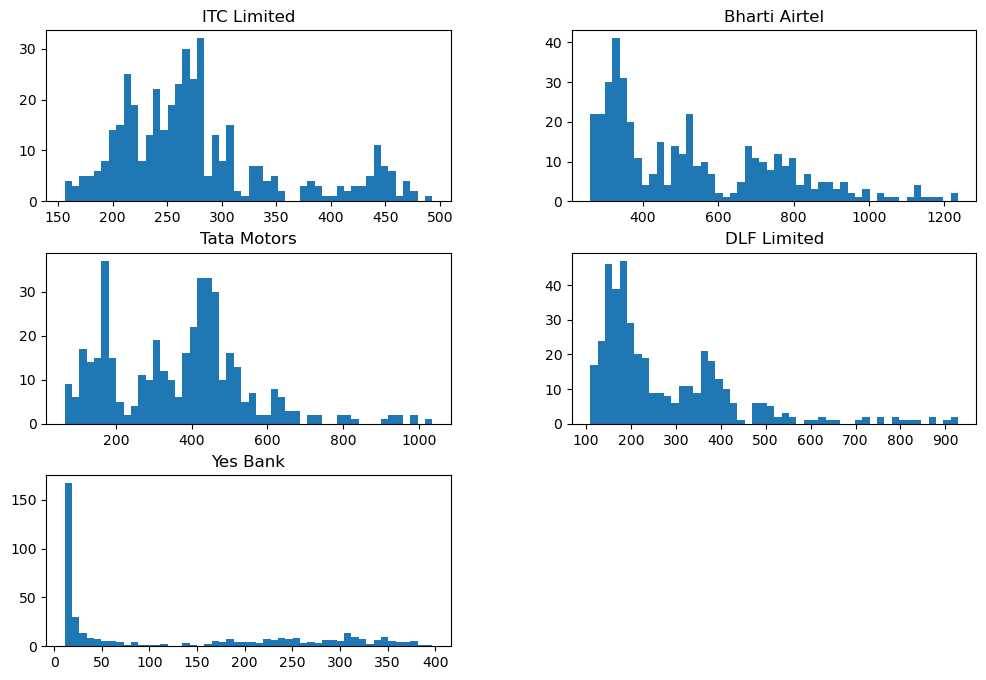

In [13]:
# Data Distribution - Plot Histograms
# Exclude 'Date' column and plot histograms
df_numeric = df.drop(columns=['Date'])  # Drop the Date column

plt.figure(figsize=(12, 6))
df_numeric.hist(bins=50, figsize=(12, 8), grid=False)
plt.show()


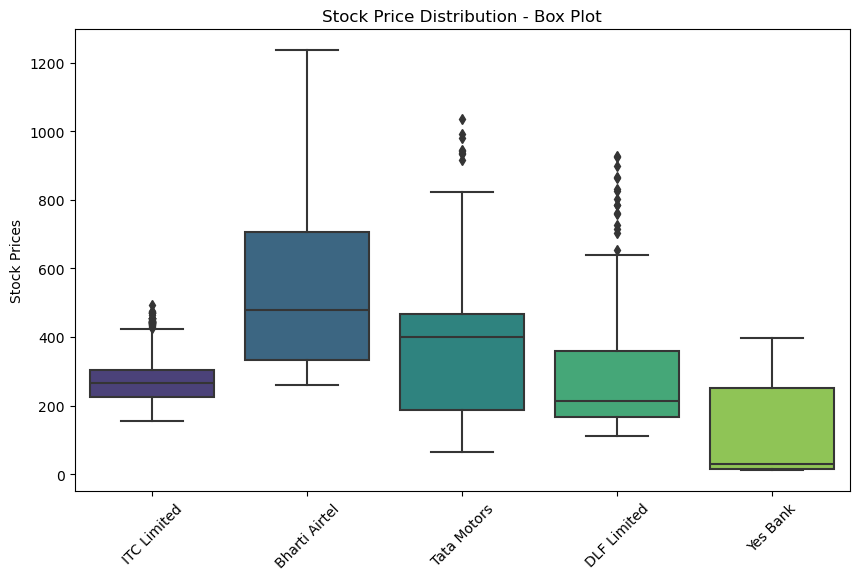

In [14]:
# Exclude 'Date' column
df_numeric = df.drop(columns=['Date'])  # Drop the Date column

# Boxplot to show distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric,palette='viridis')
plt.title("Stock Price Distribution - Box Plot")
plt.ylabel("Stock Prices")
plt.xticks(rotation=45)
plt.show()

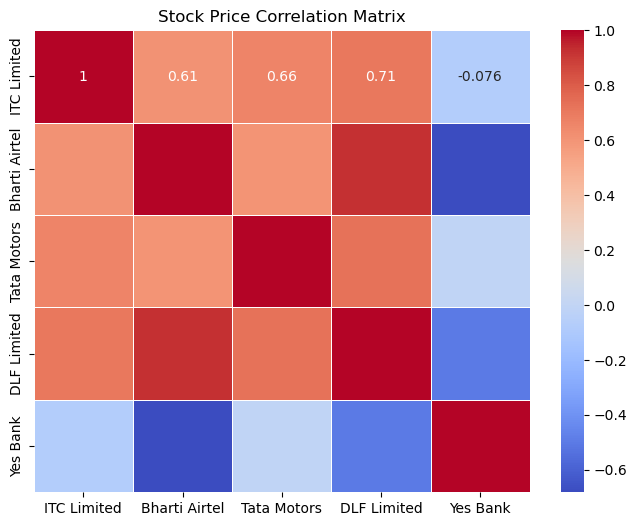

In [15]:
# Drop the 'Date' column before computing correlation
df_numeric = df.drop(columns=['Date'])

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Stock Price Correlation Matrix")
plt.show()


# Stock Price Analysis

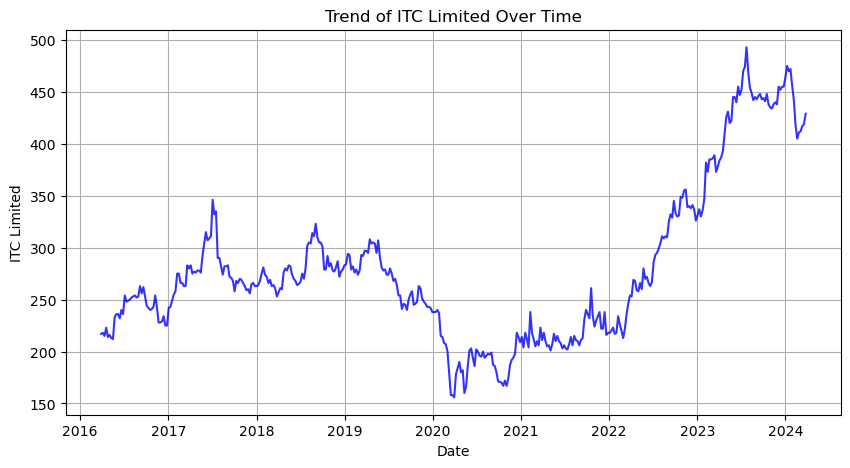

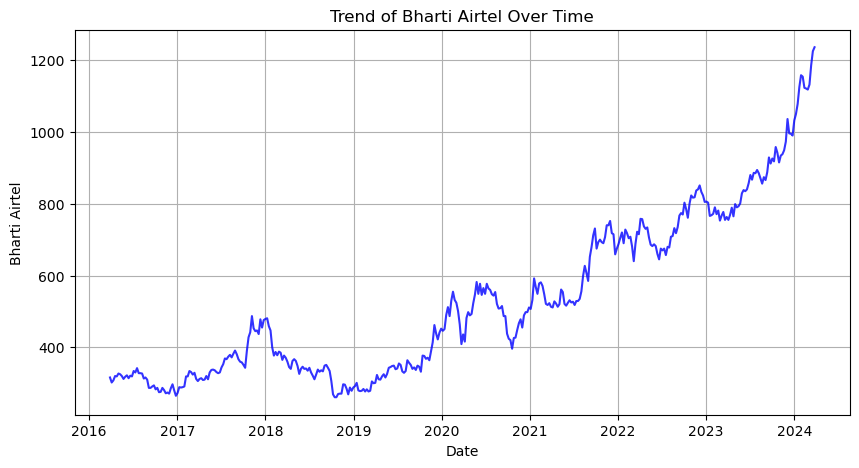

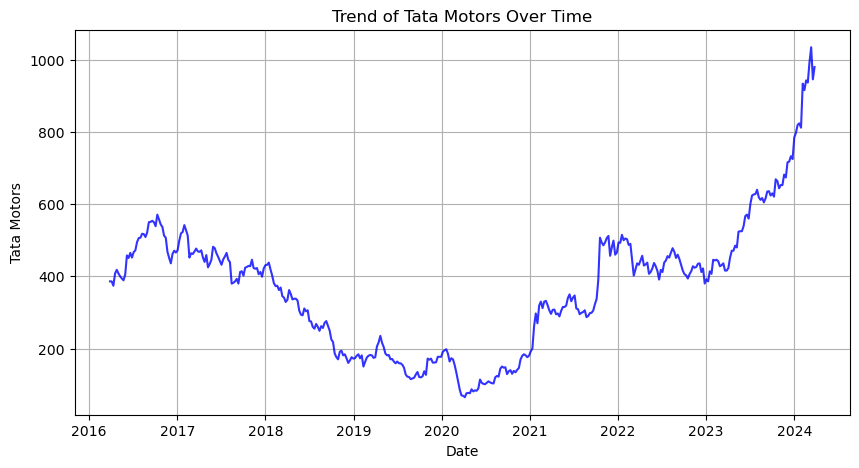

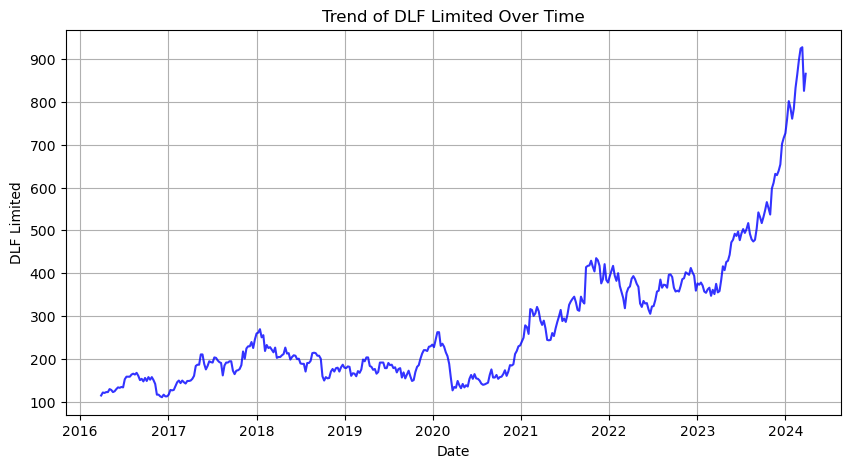

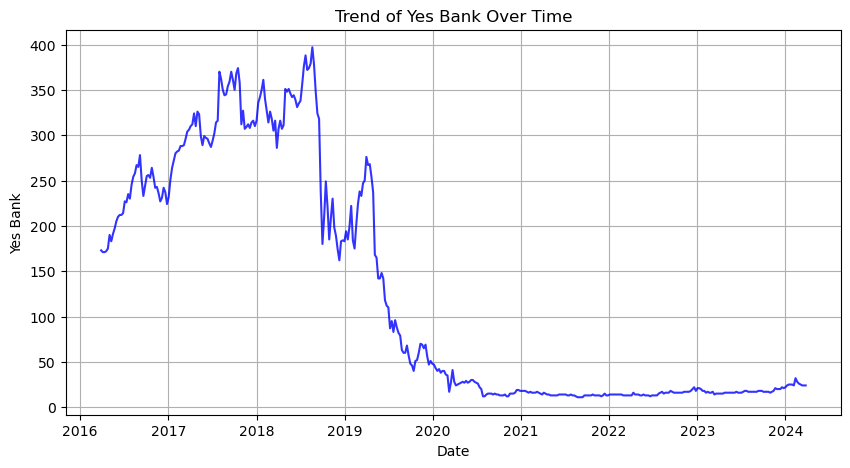

In [16]:
# Using Line Plot for Better Trend Visualization

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Plot line charts for numerical columns against Date
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df['Date'], y=df[column], color='blue', alpha=0.8)
    plt.title(f'Trend of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


**Inference**
-


## Inference from Bharti Airtel Stock Price Trend (2016–2024)
* Stable Period (2016–2017): The stock showed minor fluctuations, staying within a stable range around ₹300.
* Volatility & Growth (2018–2019): A noticeable surge occurred in 2018, followed by fluctuations and a brief decline in 2019.
* Strong Recovery & Uptrend (2020–2022): The stock rebounded significantly post-2020, crossing ₹600, suggesting strong market confidence.
* Exponential Growth (2023–2024): A rapid increase beyond ₹1200 indicates strong investor sentiment and possible fundamental growth.

## Investment Implications
* The stock has shown strong long-term growth, making it a potential candidate for long-term investments.
* The sharp rise in 2024 suggests momentum trading but could also indicate an overvaluation risk.
* Investors should monitor support and resistance levels to make informed decisions.

## Inference from Tata Motors Stock Price Trend (2016–2024)
1.Early Growth & Decline (2016–2019):

* The stock price surged above ₹600 in 2017 but then entered a prolonged downtrend.
* By 2020, the stock had dropped below ₹100, indicating financial struggles or market downturns.

2. Recovery & Stabilization (2020–2022):

* After hitting its lowest point in 2020, the stock began a gradual uptrend.
* It crossed ₹400 in 2022, showing signs of recovery and investor confidence.

3. Exponential Growth (2023–2024):

* A significant breakout occurred in 2023, pushing the stock above ₹1000 in 2024.
* This sharp rally suggests strong business performance, positive market sentiment, and increased demand for Tata Motors.

## Investment Considerations
* High Volatility: Unlike Bharti Airtel’s steady rise, Tata Motors experienced a deep fall before rebounding aggressively.
* Long-term Potential: Investors who entered during the 2020 dip have seen substantial returns.
* Risk of Correction: The steep rise suggests momentum trading, but a market correction could follow.
* Monitoring Factors: Upcoming earnings, market demand for electric vehicles (EVs), and overall automobile sector trends will be crucial.

## Inference from DLF Limited Stock Price Trend (2016–2024)
1.Gradual Growth & Fluctuations (2016–2020):

* The stock price remained relatively stable between ₹100–₹250.
* Some peaks were observed in 2018, but the price fluctuated without a clear breakout.
* A sharp dip occurred in early 2020, likely due to the COVID-19 market crash.

2.Strong Recovery & Bullish Trend (2021–2022):

* The stock rebounded post-2020, crossing ₹400 by mid-2022.
* A steady uptrend emerged, showing strong investor confidence in the real estate sector.

3.Exponential Surge (2023–2024):

* A sharp rally is observed from mid-2023 onward, pushing the stock past ₹900 in early 2024.
* This rise suggests significant demand for DLF properties, strong financials, or a booming real estate market.

4.Investment Considerations
* Consistent Growth: Unlike Tata Motors, which had a deep fall, DLF had a steadier rise.
* High Momentum Trading: The recent surge suggests high investor optimism but also the risk of short-term corrections.
* Sectoral Influence: Performance depends on real estate demand, government policies, and interest rate trends.
* Long-Term Potential: Investors who entered around 2020 (below ₹200) have seen massive returns (4x to 5x growth).

## Inference from Yes Bank Stock Price Trend (2016–2024)
1.Rapid Growth (2016–2018):

* Yes Bank's stock saw strong bullish momentum, reaching nearly ₹400 in 2018.
* Investors were optimistic, and the stock was considered one of the top-performing banking stocks at that time.

2.Drastic Collapse (2019–2020):

* A sharp decline began in late 2018 and accelerated in 2019, indicating financial distress.
* The stock crashed from ₹300+ to below ₹50 by early 2020, wiping out massive investor wealth.
* This was primarily due to corporate governance issues, rising NPAs (bad loans), and regulatory actions.
* In March 2020, the RBI and the Indian government intervened, restructuring the bank to prevent complete failure.

3.Long-Term Stabilization (2021–2024):

* After hitting lows below ₹20, the stock has remained largely stagnant.
* While there are minor upward movements, it has not recovered significantly compared to its peak years.

## Investment Considerations
* High Risk & Volatility: The stock lost more than 90% of its value and has not regained investor confidence.
* Restructuring & Recovery: Although there have been efforts to rebuild, growth has been slow.
* Speculative Investment: While traders may see short-term opportunities, long-term investors need to be cautious.
* Comparison with Peers: Other private banks like ICICI and HDFC have shown strong growth, making Yes Bank a weaker option.

## OVERALL OBSERVATION
1. Winners:

* Bharti Airtel  – Strong and consistent uptrend, best performer.
* Tata Motors  – Huge recovery post-2020, driven by EV growth.
* DLF  – Benefiting from real estate boom, sharp rise after 2021.

2.Stable Performer:

* ITC Limited – Sideways movement before a strong rally post-2021.

3.Underperformer:

* Yes Bank  – Massive collapse in 2019–2020, weak recovery.
* Investment Insight: Bharti Airtel, Tata Motors, and DLF show strong long-term growth potential. ITC is stable, while Yes Bank remains risky.

# Returns and Volatility Analysis


## Return Calculation

In [17]:
Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all rows

Return_of_Stocks

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291
5,0.009302,0.024769,-0.024214,0.055791,0.082238
6,-0.013986,-0.006135,-0.019803,-0.015625,-0.037538
7,-0.004706,-0.015504,-0.015114,-0.040166,0.042787
8,0.094452,-0.025318,-0.012772,0.016261,0.030930
9,0.012793,0.019048,0.040308,0.039531,0.039806


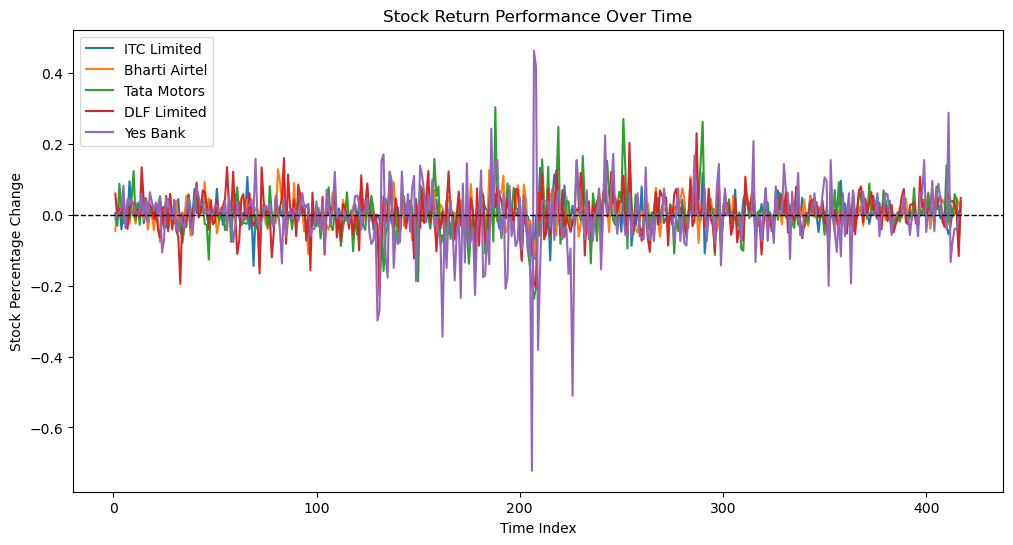

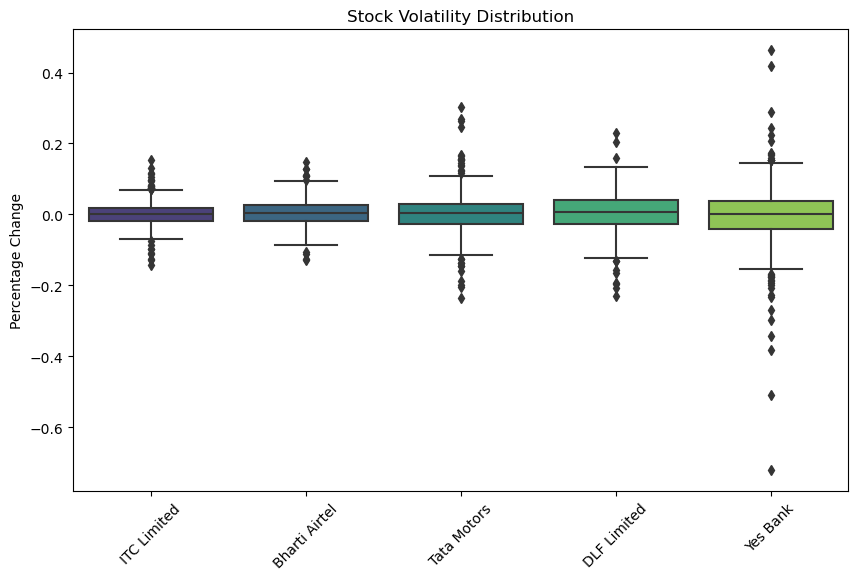

In [18]:
# Plotting line graph to show stock performance over time
plt.figure(figsize=(12, 6))
for column in Return_of_Stocks.columns:
    plt.plot(Return_of_Stocks.index, Return_of_Stocks[column], label=column)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at zero
plt.legend()
plt.title("Stock Return Performance Over Time")
plt.xlabel("Time Index")
plt.ylabel("Stock Percentage Change")
plt.show()

# Boxplot to show distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=Return_of_Stocks,palette='viridis')
plt.title("Stock Volatility Distribution")
plt.ylabel("Percentage Change")
plt.xticks(rotation=45)
plt.show()

## Stock Performance Insights
I. LINE GRAPH:

1.Volatility & Fluctuations:

* Yes Bank and DLF Limited exhibit the highest volatility, with extreme price swings.
* ITC Limited and Bharti Airtel show more stability with smaller fluctuations.

2.Periods of High Movement:

* Significant volatility is observed between index 150-250, with Yes Bank facing sharp declines and DLF Limited experiencing sudden upward movement.

3.Trend Analysis:

* No consistent uptrend or downtrend; stock movements are erratic, indicating a high-risk environment.

4.Comparative Performance:

* Tata Motors shows moderate volatility, while ITC Limited and Bharti Airtel remain relatively stable, suggesting lower risk.

## Key Takeaways 
* Risk Consideration: Yes Bank and DLF Limited appeal to high-risk investors, while ITC Limited and Bharti Airtel offer stability.
* Market Sensitivity: Sharp fluctuations indicate strong influence from external market events.
* Diversification Strategy: A balanced portfolio with both volatile and stable stocks is essential for effective risk management.

## Stock Volatility Insights:
2. BOXPLOT:
* High Volatility & Risk: Yes Bank and DLF Limited exhibit the highest volatility with wide fluctuations and extreme outliers, making them high-risk, high-reward stocks.
* Stable Performers: ITC Limited and Bharti Airtel show lower volatility with tightly packed distributions, indicating more predictable returns.
* Outlier Trends: Yes Bank and DLF Limited frequently experience sudden price spikes or crashes, while ITC and Bharti Airtel have fewer extreme movements.
* Return Consistency: Bharti Airtel and ITC Limited have a narrower interquartile range (IQR), suggesting more stable stock performance, whereas Tata * * Motors and DLF Limited have broader IQRs, indicating greater price variation.

## Key Takeaways:
* High-Risk Investments: Yes Bank and DLF Limited present opportunities for high returns but come with significant volatility, requiring careful risk management.
* Stable Investment Options: ITC Limited and Bharti Airtel demonstrate lower variance, making them suitable for risk-averse investors seeking consistent performance.
* Moderate Risk Profile: Tata Motors offers a balanced approach, exhibiting a mix of stability and moderate volatility.
* Diversification Strategy: A well-structured portfolio should include both high- and low-volatility stocks to mitigate risk while optimizing returns.

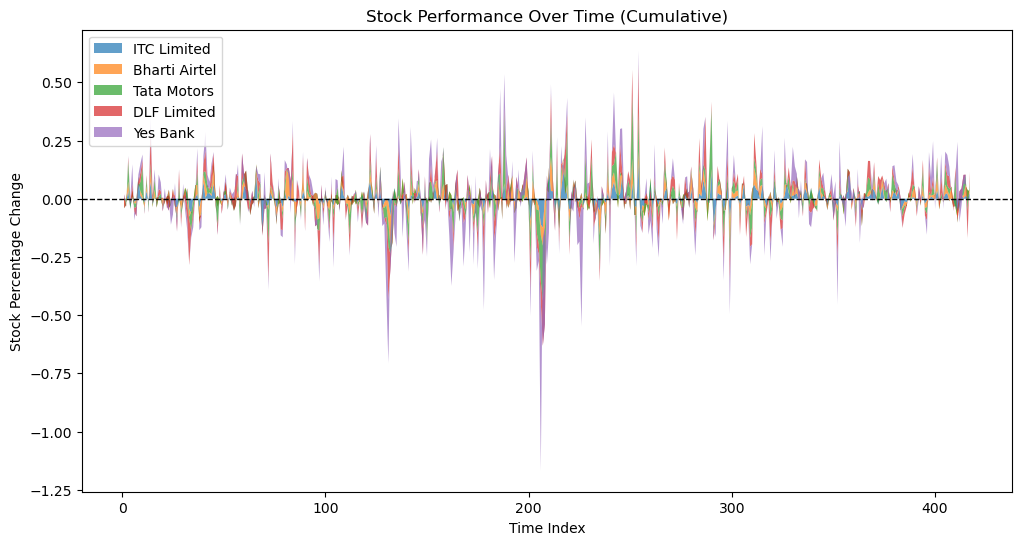

In [19]:
# Area Chart (For Cumulative Trends)
plt.figure(figsize=(12, 6))
plt.stackplot(Return_of_Stocks.index, Return_of_Stocks.T, labels=Return_of_Stocks.columns, alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at zero
plt.legend(loc="upper left")
plt.title("Stock Performance Over Time (Cumulative)")
plt.xlabel("Time Index")
plt.ylabel("Stock Percentage Change")
plt.show()


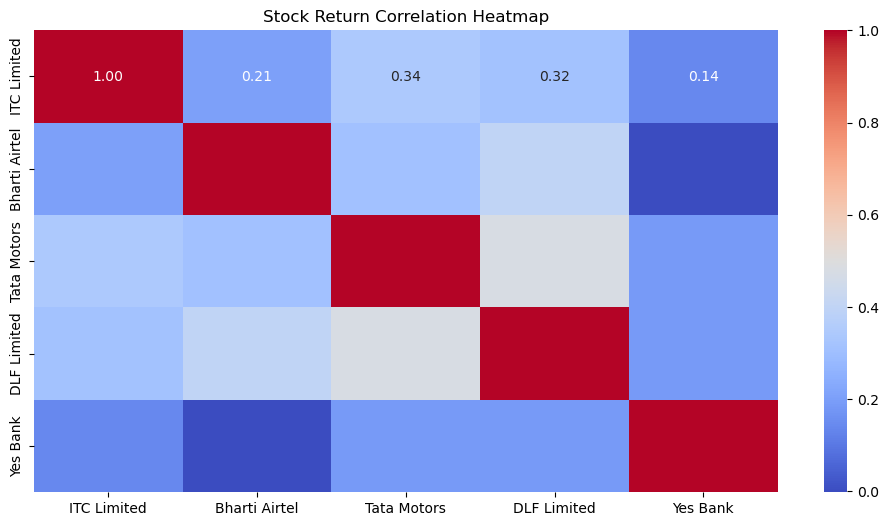

In [20]:
# Heatmap (For Correlations Over Time)
plt.figure(figsize=(12, 6))
sns.heatmap(Return_of_Stocks.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stock Return Correlation Heatmap")
plt.show()


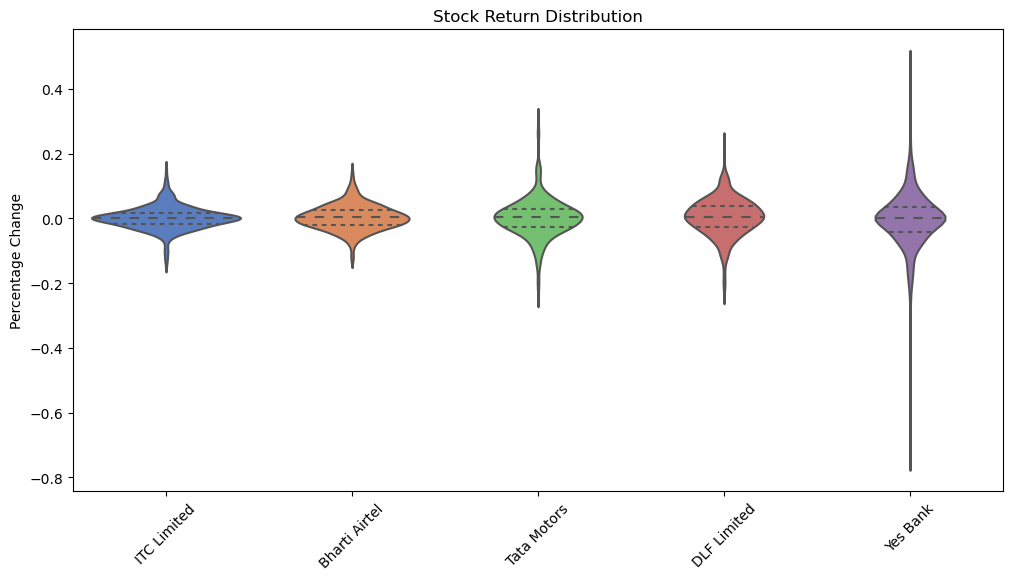

In [21]:
# Violin Plot (For Stock Volatility and Spread)
plt.figure(figsize=(12, 6))
sns.violinplot(data=Return_of_Stocks, inner="quartile", palette="muted")
plt.title("Stock Return Distribution")
plt.ylabel("Percentage Change")
plt.xticks(rotation=45)
plt.show()


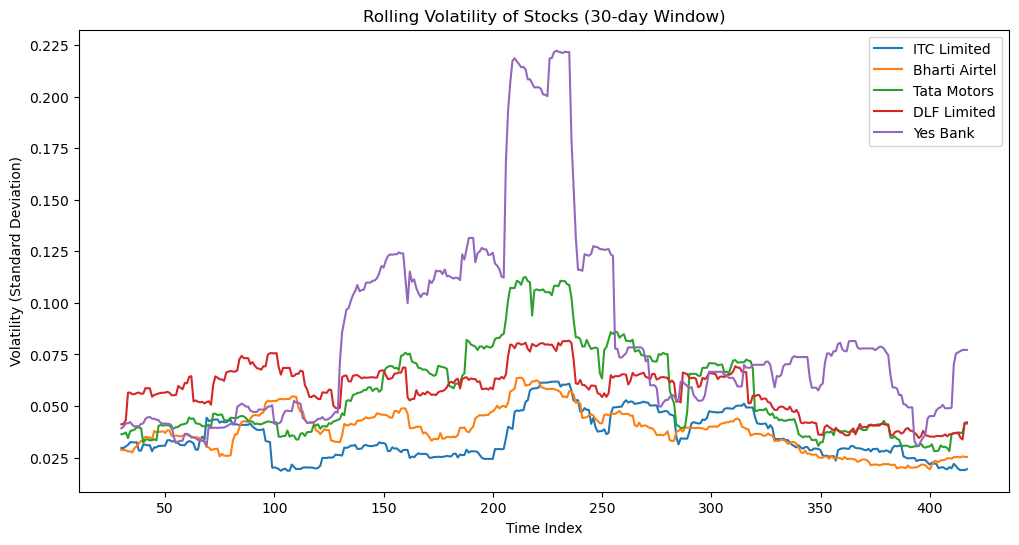

In [22]:
# Rolling Standard Deviation (For Volatility Trends)
rolling_volatility = Return_of_Stocks.rolling(window=30).std()

plt.figure(figsize=(12, 6))
for column in rolling_volatility.columns:
    plt.plot(rolling_volatility.index, rolling_volatility[column], label=column)
plt.legend()
plt.title("Rolling Volatility of Stocks (30-day Window)")
plt.xlabel("Time Index")
plt.ylabel("Volatility (Standard Deviation)")
plt.show()


## Average Returns

In [23]:
StockMeans = Return_of_Stocks.mean()  ## Get the mean for the returns for all stocks
StockMeans.sort_values()


Yes Bank        -0.004737
ITC Limited      0.001634
Tata Motors      0.002234
Bharti Airtel    0.003271
DLF Limited      0.004863
dtype: float64

## Volatility

In [24]:
StockStdDev = Return_of_Stocks.std()  ## Get the standard deviation for the returns for all stocks
StockStdDev.sort_values()


ITC Limited      0.035904
Bharti Airtel    0.038728
DLF Limited      0.057785
Tata Motors      0.060484
Yes Bank         0.093879
dtype: float64

**Inference**
-


## Visualizing Returns and Volatility

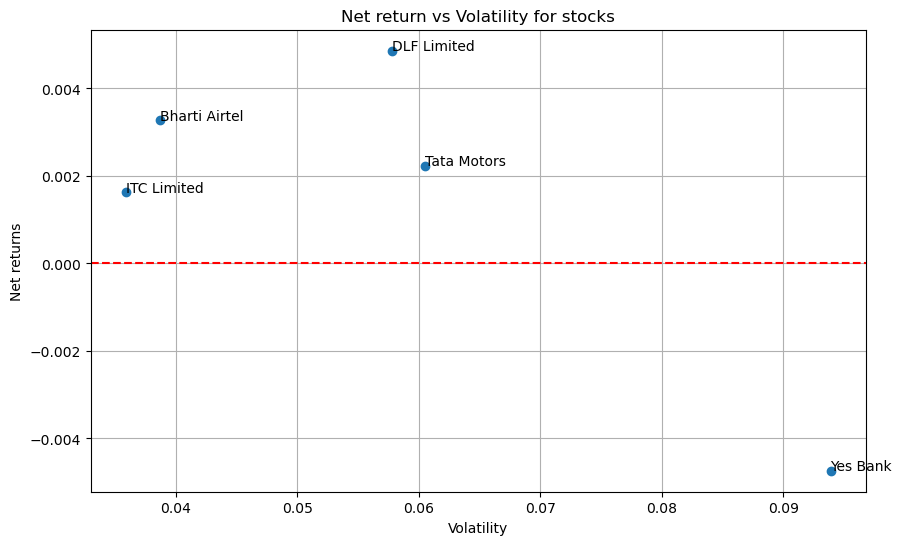

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# Scatter plot of returns vs volatility for all stocks
plt.scatter(StockStdDev, StockMeans)
plt.axhline(y=0, linestyle='--', color="red")

# Annotate each point with the corresponding stock name/index
for index in StockMeans.index:
    ax.text(StockStdDev[index], StockMeans[index], index)

plt.xlabel('Volatility')
plt.ylabel('Net returns')
plt.title('Net return vs Volatility for stocks')
plt.grid()
plt.show()

**Inference**
-


# Conclusions and Recommendations